# Importando bibliotecas e lendo arquivos

In [2]:
import pandas as pd
from scipy.stats import geom
import matplotlib.pyplot as plt
import numpy as np

In [37]:
tabela = pd.read_csv('campeonato-brasileiro-full.csv')

In [38]:
# Limpanda o dataframe
del tabela['formacao_mandante']
del tabela['formacao_visitante']
del tabela['tecnico_mandante']
del tabela['tecnico_visitante']
del tabela['arena']
del tabela['hora']

In [39]:
tabela

,ID,rodata,data,mandante,visitante,vencedor,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,Guarani,Vasco,Guarani,4,2,SP,RJ
1,2,1,29/3/2003,Athletico-PR,Gremio,Athletico-PR,2,0,PR,RS
2,3,1,30/3/2003,Flamengo,Coritiba,-,1,1,RJ,PR
3,4,1,30/3/2003,Goias,Paysandu,-,2,2,GO,PA
4,5,1,30/3/2003,Internacional,Ponte Preta,-,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...
8020,8021,38,13/11/2022,Cuiaba,Coritiba,Cuiaba,2,1,MT,PR
8021,8022,38,13/11/2022,Bragantino,Fluminense,Fluminense,0,1,SP,RJ
8022,8023,38,13/11/2022,Corinthians,Atletico-MG,Atletico-MG,0,1,SP,MG
8023,8024,38,13/11/2022,Internacional,Palmeiras,Internacional,3,0,RS,SP


# Distribuição geométrica

In [43]:
# Função que calcula, em média, quantos jogos são necessários até a primeira vitória
def previsao(x):
    distribuicao = geom(x)
    media = distribuicao.mean()
    return round(media, 0)

In [40]:
equipes = ['Corinthians', 'Palmeiras', 'Santos', 'Gremio', 'Cruzeiro',
          'Flamengo', 'Vasco', 'Cuiaba', 'Atletico-MG', 'Botafogo-RJ',
          'Athletico-PR', 'Bahia', 'Sao Paulo', 'Fluminense', 'America-MG',
          'Bragantino', 'Coritiba', 'Goias', 'Fortaleza', 'Internacional']

In [106]:
# Criando dicionário com as probabilidades de vitórias como mandante
casa = {}
    
for time in equipes:
    jogos_mandante = tabela[tabela['mandante'] == time]
    vitorias_mandante = len(jogos_mandante[jogos_mandante['vencedor'] == time])
    casa[time] = vitorias_mandante / len(jogos_mandante)

casa

{'Corinthians': 0.5525606469002695,
 'Palmeiras': 0.5689655172413793,
 'Santos': 0.5743589743589743,
 'Gremio': 0.5828571428571429,
 'Cruzeiro': 0.5525525525525525,
 'Flamengo': 0.5501285347043702,
 'Vasco': 0.4406779661016949,
 'Cuiaba': 0.34210526315789475,
 'Atletico-MG': 0.5579514824797843,
 'Botafogo-RJ': 0.4575757575757576,
 'Athletico-PR': 0.568733153638814,
 'Bahia': 0.41237113402061853,
 'Sao Paulo': 0.5666666666666667,
 'Fluminense': 0.49230769230769234,
 'America-MG': 0.42105263157894735,
 'Bragantino': 0.43859649122807015,
 'Coritiba': 0.4927536231884058,
 'Goias': 0.4891304347826087,
 'Fortaleza': 0.460431654676259,
 'Internacional': 0.5929919137466307}

In [107]:
# Criando dicionário com as probabilidades de vitórias como visitante
fora = {}
    
for time in equipes:
    jogos_visitante = tabela[tabela['visitante'] == time]
    vitorias_visitante = len(jogos_visitante[jogos_visitante['vencedor'] == time])
    fora[time] = vitorias_visitante / len(jogos_visitante)

fora

{'Corinthians': 0.29380053908355797,
 'Palmeiras': 0.31896551724137934,
 'Santos': 0.2692307692307692,
 'Gremio': 0.26,
 'Cruzeiro': 0.32732732732732733,
 'Flamengo': 0.309462915601023,
 'Vasco': 0.22372881355932203,
 'Cuiaba': 0.18421052631578946,
 'Atletico-MG': 0.27297297297297296,
 'Botafogo-RJ': 0.23780487804878048,
 'Athletico-PR': 0.22641509433962265,
 'Bahia': 0.18041237113402062,
 'Sao Paulo': 0.3333333333333333,
 'Fluminense': 0.2923076923076923,
 'America-MG': 0.1368421052631579,
 'Bragantino': 0.22807017543859648,
 'Coritiba': 0.16304347826086957,
 'Goias': 0.23550724637681159,
 'Fortaleza': 0.20863309352517986,
 'Internacional': 0.2803234501347709}

In [62]:
# Criando dicionário com as probabilidades de vitórias de todos os times
todos = {}

for time in equipes:
    todos[time] = round(len(tabela[tabela['vencedor'] == time]) / (len(tabela[tabela['mandante'] == time]) + len(tabela[tabela['visitante'] == time])), 3)

todos

# Dicionário, com todos os times, da média de jogos até a primeira vitória 
esp = {}
for time, valor in todos.items():
    esp[time] = previsao(valor)

esp

{'Corinthians': 2.0,
 'Palmeiras': 2.0,
 'Santos': 2.0,
 'Gremio': 2.0,
 'Cruzeiro': 2.0,
 'Flamengo': 2.0,
 'Vasco': 3.0,
 'Cuiaba': 4.0,
 'Atletico-MG': 2.0,
 'Botafogo-RJ': 3.0,
 'Athletico-PR': 3.0,
 'Bahia': 3.0,
 'Sao Paulo': 2.0,
 'Fluminense': 3.0,
 'America-MG': 4.0,
 'Bragantino': 3.0,
 'Coritiba': 3.0,
 'Goias': 3.0,
 'Fortaleza': 3.0,
 'Internacional': 2.0}

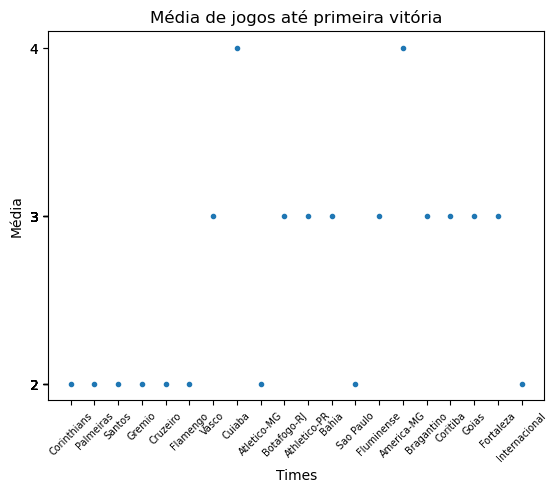

In [45]:
# Gráfico

x = list(esp.keys())
y = list(esp.values())

plt.scatter(x, y, marker='.') 

plt.xlabel('Times') 
plt.ylabel('Média')

plt.title('Média de jogos até primeira vitória')

plt.xticks(rotation=45, fontsize=7)
plt.yticks(y)

plt.savefig('Distribuição geométrica.png', dpi=300)

plt.show()